In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append("../src")
from utils import save_plot

In [3]:
NB15_1=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_1.csv')
NB15_2=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_2.csv')
NB15_3=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_3.csv')
NB15_4=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_4.csv')

features=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\NUSW-NB15_features.csv',encoding='latin1')

C:\Users\hp\AppData\Local\Temp\ipykernel_9064\1995450216.py:1: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_1=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_1.csv')
C:\Users\hp\AppData\Local\Temp\ipykernel_9064\1995450216.py:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  NB15_2=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Python\Machine Learning\project\data\UNSW-NB15_2.csv')


In [4]:
NB15_1.columns = features['Name'] 
NB15_2.columns = features['Name'] 
NB15_3.columns = features['Name'] 
NB15_4.columns = features['Name'] 

In [18]:
df=pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

In [19]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
df

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,175.45.176.3,57672,149.171.126.15,3260,tcp,CON,0.285356,986,86,62,...,,10,8,4,5,3,1,7,NaN,0
1,59.166.0.8,38052,149.171.126.9,6881,tcp,FIN,0.314311,1540,1644,31,...,,14,6,8,12,5,1,6,NaN,0
2,59.166.0.0,42911,149.171.126.2,38558,udp,CON,0.301180,536,304,31,...,0,9,16,7,6,1,1,3,NaN,0
3,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000009,114,0,254,...,,33,33,17,17,17,17,33,Generic,1
4,59.166.0.5,61544,149.171.126.6,53,udp,CON,0.001079,146,178,31,...,,2,2,5,4,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540038,59.166.0.8,34415,149.171.126.0,5190,tcp,FIN,0.008119,1920,4312,31,...,0,3,10,4,1,1,1,1,NaN,0
2540039,59.166.0.8,56352,149.171.126.2,53,udp,CON,0.001047,130,162,31,...,,1,1,2,6,1,1,1,NaN,0
2540040,59.166.0.9,25527,149.171.126.4,6881,tcp,FIN,0.013106,1540,1644,31,...,,12,11,8,9,6,1,6,NaN,0
2540041,175.45.176.1,47439,149.171.126.14,53,udp,INT,0.000003,114,0,254,...,,37,37,26,26,26,13,37,Generic,1


In [25]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Label', data=df, palette='coolwarm', ax=ax)
ax.set_title("Distribution of Normal vs Attack Traffic")
ax.set_xlabel("Label (0 = Normal, 1 = Attack)")
ax.set_ylabel("Count")

save_plot(fig, "class_distribution.png")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9064\2611043094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette='coolwarm', ax=ax)


[✔] Figure saved at: class_distribution.png


In [26]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y='attack_cat', data=df, order=df['attack_cat'].value_counts().index, palette='mako', ax=ax)
ax.set_title("Distribution of Attack Categories")
ax.set_xlabel("Count")
ax.set_ylabel("Attack Category")

save_plot(fig, "attack_categories.png")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9064\3622984436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='attack_cat', data=df, order=df['attack_cat'].value_counts().index, palette='mako', ax=ax)


[✔] Figure saved at: attack_categories.png


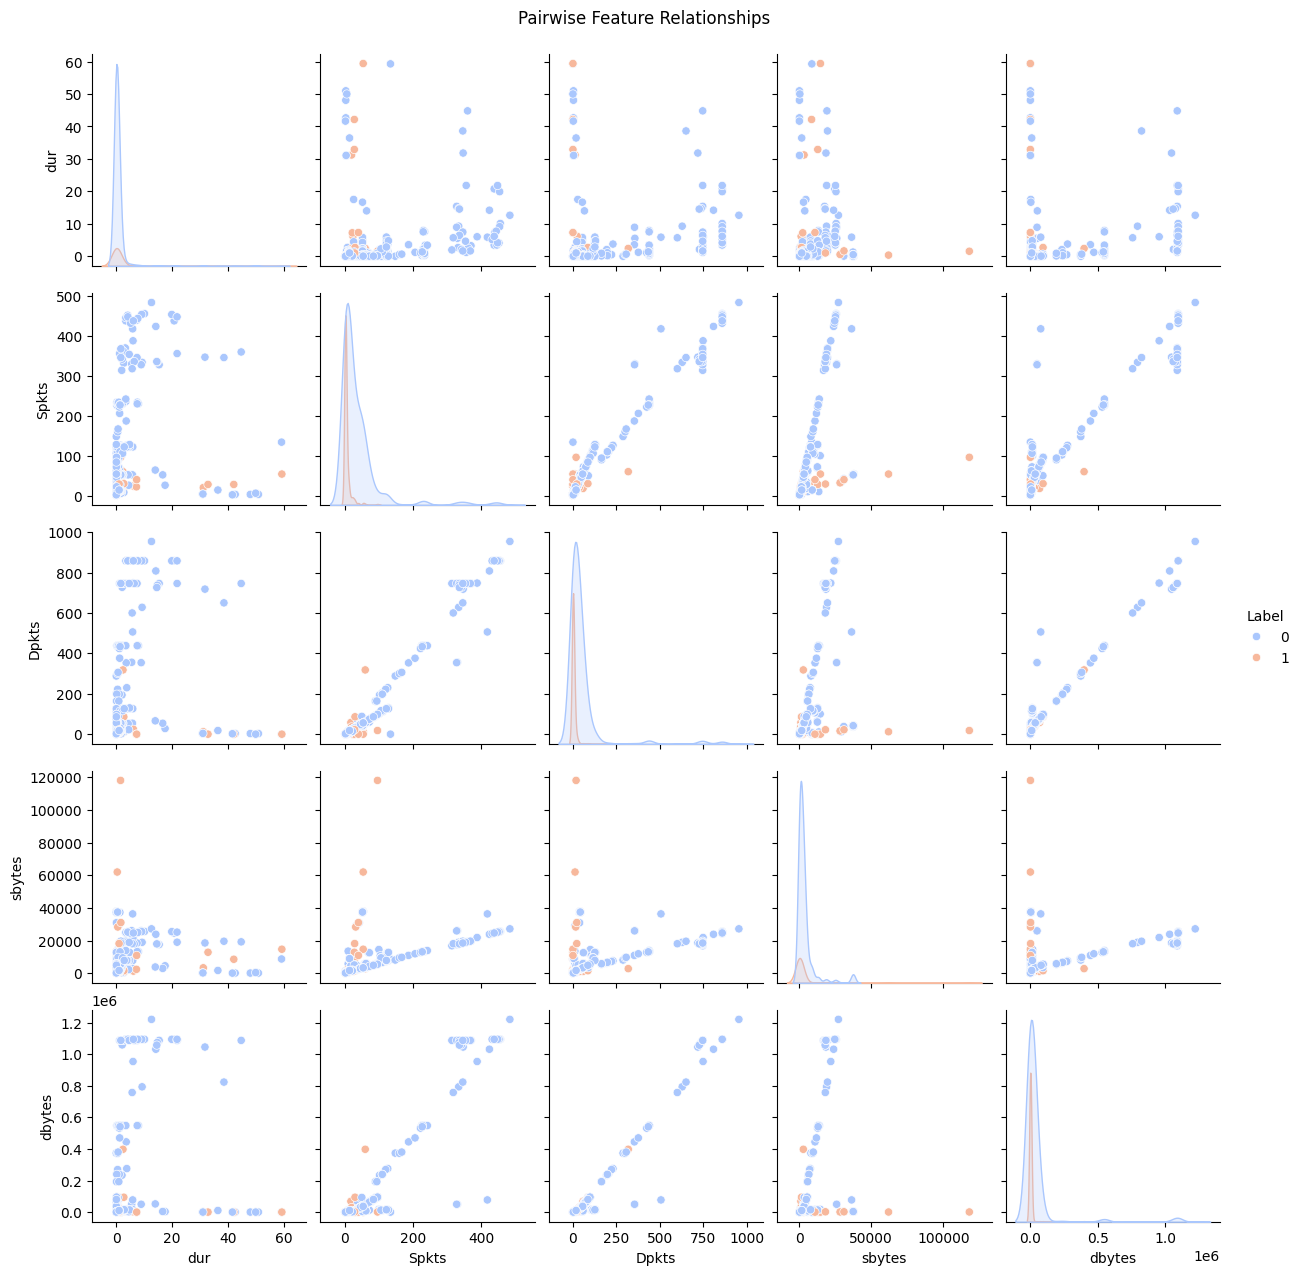

In [10]:
# --- Example continuous features ---
num_features = ['dur', 'Spkts', 'Dpkts', 'sbytes', 'dbytes']

# Pairplot of numeric features vs label
sns.pairplot(data.sample(2000), vars=num_features, hue='Label', diag_kind='kde', palette='coolwarm')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', cbar=False, ax=ax)
ax.set_title("Feature Correlation Heatmap")

save_plot(fig, "correlation_heatmap.png")
plt.show()

high_corr = [(c1, c2, corr.loc[c1, c2]) for c1 in corr.columns for c2 in corr.columns if abs(corr.loc[c1, c2]) > 0.9 and c1 != c2]
print(f"Highly correlated feature pairs (|r| > 0.9): {len(high_corr)}")